# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [1]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
b = a[:-4:-1]
# reverse the list
c = a[::-1]

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
d =[]
for i in a:
    d.append(i*i)
# list comprehension: e = [i*i for i in a]


In [2]:
# create a numpy array from this list
import numpy as np
b = np.array(a) # change this
b

array([1, 2, 3, 4, 5, 6])

In [3]:
# find the mean of b
np.mean(b)
#b.mean()

3.5

In [4]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(a)

array([ 1,  4,  9, 16, 25, 36])

In [5]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape(2,3)
b

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
# find the mean value of each row
np.mean(b, axis = 1)

array([2., 5.])

In [7]:
# find the mean value of each column
np.mean(b, axis = 0)

array([2.5, 3.5, 4.5])

In [8]:
# find the third column of b
b[:,2] #returns a specific column at index 2 (col index is input after :,)
#b[1,:] #returns a specific row at index 1 (row index is input before ,:)

array([3, 6])

In [9]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv("../data/starbucks_clean.csv")
df.head()

,Unnamed: 0,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,0,coffee,brewed coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0
1,1,coffee,brewed coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0
2,2,coffee,brewed coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0
3,3,coffee,brewed coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0
4,4,classic espresso drinks,caffè latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0


In [10]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df["calories"].mean()

193.87190082644628

In [11]:
# how many different categories of beverages are there?
len(df["beverage_category"].unique())

9

In [12]:
# what is the average # calories for each beverage category?
category_grp = df.groupby("beverage_category")
category_grp["calories"].mean()


beverage_category
classic espresso drinks             140.172414
coffee                                4.250000
frappuccino blended coffee          276.944444
frappuccino blended crème           233.076923
frappuccino light blended coffee    162.500000
shaken iced beverages               114.444444
signature espresso drinks           250.000000
smoothies                           282.222222
tazo tea drinks                     177.307692
Name: calories, dtype: float64

In [13]:
# what beverage preparation includes the most sugar on average?
bev_prep_grp = df.groupby("beverage_prep")
bev_prep_grp["sugars "].mean()
# Whole Milk has the most sugar on average

beverage_prep
2% Milk               30.980000
Doppio                 0.000000
Grande                20.000000
Grande Nonfat Milk    38.615385
Short                  8.250000
Short Nonfat Milk     17.000000
Solo                   0.000000
Soymilk               31.848485
Tall                  14.714286
Tall Nonfat Milk      28.521739
Venti                 27.714286
Venti Nonfat Milk     50.045455
Whole Milk            55.687500
Name: sugars , dtype: float64

In [14]:
# what is the average % daily value calcium content for each beverage?
bev_grp = df.groupby("beverage")
bev_grp["calcium "].mean()

beverage
banana chocolate smoothie                           20.000000
brewed coffee                                        0.500000
caffè americano                                      1.500000
caffè latte                                         35.000000
caffè mocha without whipped cream                   30.000000
cappuccino                                          22.500000
caramel                                             11.000000
caramel apple spice without whipped cream            0.000000
caramel macchiato                                   28.333333
caramel without whipped cream                       12.000000
coffee                                              12.333333
espresso                                             0.000000
hot chocolate without whipped cream                 35.000000
iced brewed coffee with classic syrup                0.000000
iced brewed coffee with milk  classic syrup          8.000000
java chip                                           11.666667

In [15]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
df_low_cal = df[df["calories"] < 100]
df_low_cal['protein '].idxmax()
df.iloc[df_low_cal['protein '].idxmax()]


Unnamed: 0                                   50
beverage_category       classic espresso drinks
beverage                             cappuccino
beverage_prep                Grande Nonfat Milk
calories                                     80
total fat                                   0.2
trans fat                                   0.1
saturated fat                               0.0
 sodium                                       5
total carbohydrates                          90
cholesterol                                  12
dietary fibre                                 0
sugars                                       10
protein                                     8.0
vitamin a                                    15
vitamin c                                     0
calcium                                      25
iron                                        0.0
caffeine                                  150.0
Name: 50, dtype: object

<AxesSubplot:ylabel='Frequency'>

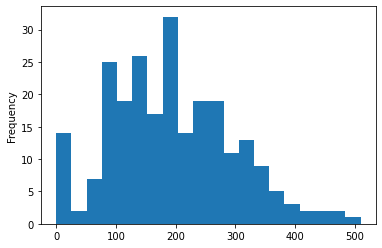

In [16]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
df["calories"].plot.hist(bins=20)

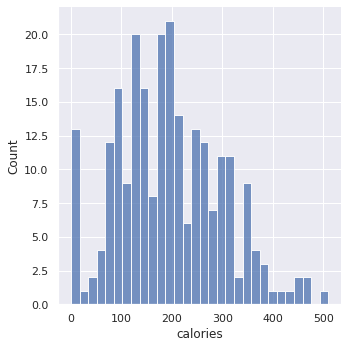

In [17]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()
sns.displot(data = df, x="calories", bins=30)

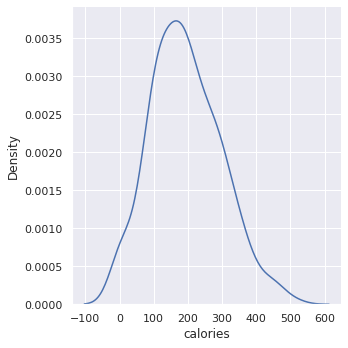

In [18]:
sns.displot(data=df, x="calories", kind="kde")

<AxesSubplot:xlabel='calories', ylabel='total fat '>

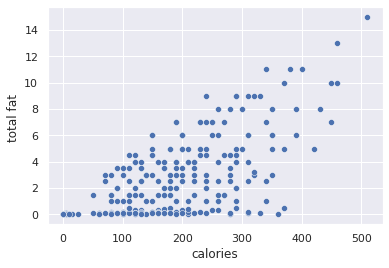

In [19]:
# plot calories against total fat using seaborn
sns.scatterplot(data=df, x="calories", y="total fat ")

array([[<AxesSubplot:title={'center':'2% Milk'}>,
        <AxesSubplot:title={'center':'Doppio'}>,
        <AxesSubplot:title={'center':'Grande'}>,
        <AxesSubplot:title={'center':'Grande Nonfat Milk'}>],
       [<AxesSubplot:title={'center':'Short'}>,
        <AxesSubplot:title={'center':'Short Nonfat Milk'}>,
        <AxesSubplot:title={'center':'Solo'}>,
        <AxesSubplot:title={'center':'Soymilk'}>],
       [<AxesSubplot:title={'center':'Tall'}>,
        <AxesSubplot:title={'center':'Tall Nonfat Milk'}>,
        <AxesSubplot:title={'center':'Venti'}>,
        <AxesSubplot:title={'center':'Venti Nonfat Milk'}>],
       [<AxesSubplot:title={'center':'Whole Milk'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

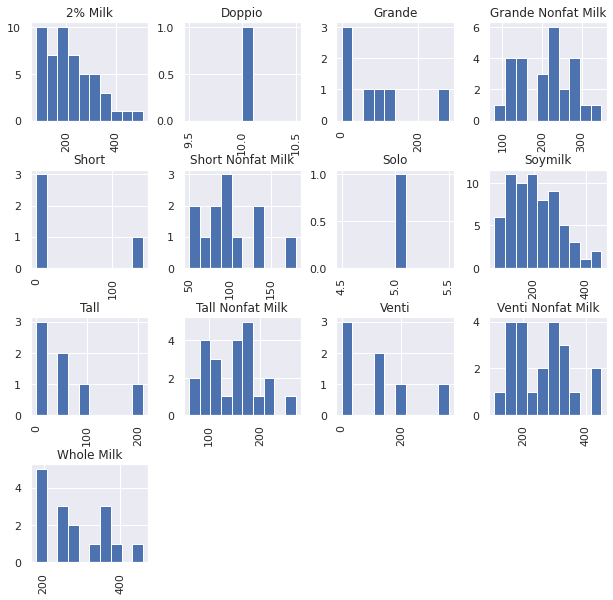

In [20]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
df["calories"].hist(by=df["beverage_prep"], figsize=(10, 10))